In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from linear_regression import LinearRegression
from linear_regression import RegressionMetrics

**Import the dataset**
- The dataset contains information of IT professionals' Salary based on their experience.
- It has two columns.
    - YearsExperience
    - Salary

In [2]:
data = pd.read_csv('salary_Data.csv')
data.head()

,YearsExperience,Salary
0,4.4,52435.235341
1,9.6,76504.963248
2,7.6,68458.803883
3,6.4,52062.155427
4,2.4,40901.640561


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  100 non-null    float64
 1   Salary           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


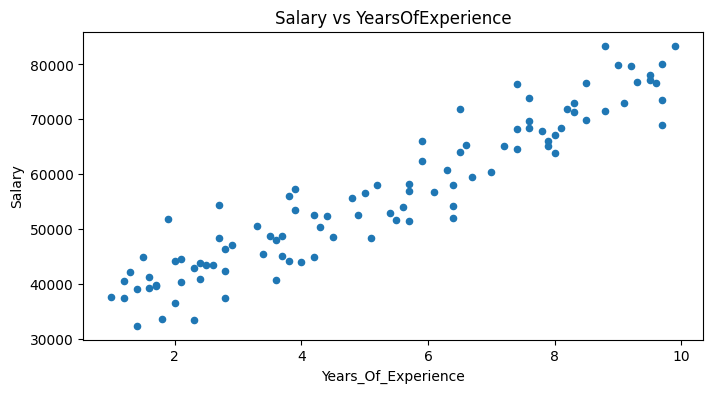

In [4]:
data.plot(kind='scatter',x='YearsExperience',y='Salary',figsize=(8,4))
plt.title('Salary vs YearsOfExperience')
plt.xlabel('Years_Of_Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
X = data['YearsExperience']
Y = data['Salary']

In [6]:
X.shape, Y.shape

((100,), (100,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
X_train.shape, X_test.shape

((80,), (20,))

In [9]:
y_train.shape, y_test.shape 

((80,), (20,))

**Standardization of data**
The standardization process involve the following steps:
1. Calculate the mean  and standard deviation for each feature in the dataset.
2. For each data point (sample), substract the mean of the feature and then divide by the standard deviation of the feature.

In [10]:
#Standardization function
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation

    Args:
        X_train (_type_): Training data 
        X_test (_type_): Testing data
        
    Return:
        Tuple of standardize training and testing data
    """
    #Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train,axis=0)
    
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

stnd_y_train, stnd_y_test = standardize_data(y_train,y_test)    
    

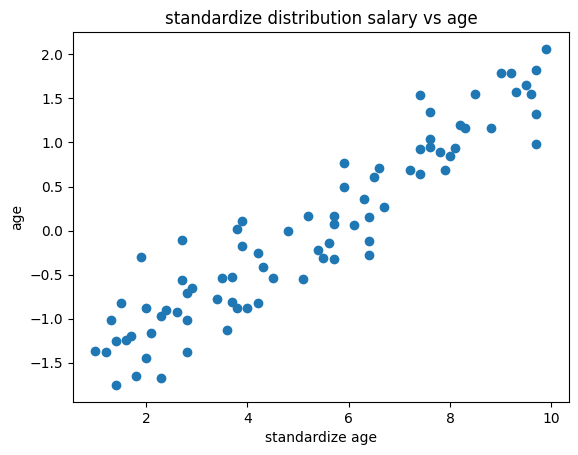

In [11]:
plt.scatter(X_train,stnd_y_train)
plt.title("standardize distribution salary vs age")
plt.xlabel("standardize age")
plt.ylabel("age")
plt.show()

In [12]:
stnd_X_train, stnd_X_test = standardize_data(X_train,X_test)   

In [13]:
X_train = np.array(stnd_X_train).reshape(len(X_train),1)

In [14]:
y_train = np.array(y_train)

In [15]:
X_train

array([[ 1.55635606],
       [ 1.44212809],
       [-0.91858324],
       [-1.48972307],
       [ 1.78481199],
       [-0.95665923],
       [-1.18511516],
       [ 0.18562045],
       [ 0.83291226],
       [-1.60395104],
       [ 1.70866001],
       [ 0.18562045],
       [-0.49974736],
       [ 0.41407638],
       [ 0.3379244 ],
       [-1.07088719],
       [-1.10896318],
       [ 0.26177243],
       [ 1.17559616],
       [-0.57589934],
       [-0.95665923],
       [ 1.70866001],
       [ 1.36597611],
       [ 0.07139248],
       [ 0.14754446],
       [-0.61397532],
       [ 0.52830435],
       [ 1.09944419],
       [ 1.25174814],
       [-0.88050725],
       [-0.04283549],
       [ 0.45215237],
       [ 0.18562045],
       [ 0.75676028],
       [ 0.45215237],
       [-0.38551939],
       [-1.4135711 ],
       [-0.65205131],
       [-0.57589934],
       [-0.0047595 ],
       [-1.29934313],
       [-1.22319115],
       [ 0.45215237],
       [ 1.51828007],
       [ 1.70866001],
       [ 1

In [16]:
from linear_regression import LinearRegression, RegressionMetrics
lr = LinearRegression(learning_rate=0.01)
lr.fit(X_train,y_train,1000)

Iteration: 0, Cost: 1648275053.2549112
Iteration: 100, Cost: 21148961.965114523
Iteration: 200, Cost: 12011343.974149661
Iteration: 300, Cost: 10787088.886743935
Iteration: 400, Cost: 10623063.588190107
Iteration: 500, Cost: 10601087.532021383
Iteration: 600, Cost: 10598143.18716124
Iteration: 700, Cost: 10597748.70479421
Iteration: 800, Cost: 10597695.852174932
Iteration: 900, Cost: 10597688.77099819


In [17]:
lr.save_model('model.pkl')

In [18]:
# use the saved model for analysis
model = LinearRegression.load_model("model.pkl")